In [1]:
import numpy as np
import birdwatcher as bw
from birdwatcher.movementdetection import detect_movementmog2
from birdwatcher.plotting import imshow_frame
import matplotlib.pyplot as plt
%matplotlib inline

This notebook shows movement detection the easy way, using a high-level function.

In [2]:
vf = bw.testvideosmall()

In [3]:
%%time
coords, coordscount, coordsmean = detect_movementmog2(vf.filepath, morphologyex=2, analysispath='.',
                                                      ignore_firstnframes=50, overwrite=True,
                                                      VarThreshold=70, NMixtures=8, History=3)

Wall time: 11.9 s


c:\users\gabriel\dropbox\programs\birdwatcher\birdwatcher\movementdetection.py:154: RuntimeWarning: Mean of empty slice.
  return np.array([idx.mean(0) for idx in coords.iter_arrays()])
C:\Users\Gabriel\anaconda3\envs\Sl2020a\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [4]:
coords.tovideo('zf20s_coords.mp4', framerate=vf.avgframerate)

Text(0, 0.5, 'number of pixels')

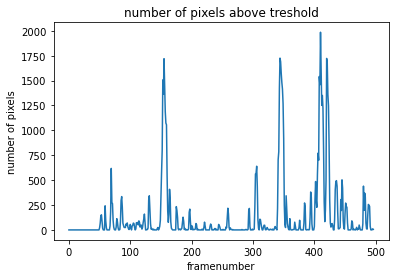

In [5]:
plt.plot(coordscount)
plt.title('number of pixels above treshold')
plt.xlabel('framenumber')
plt.ylabel('number of pixels')

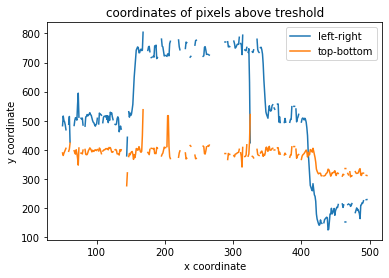

In [6]:
plt.plot(coordsmean)
plt.title('coordinates of pixels above treshold')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend(['left-right', 'top-bottom'])

The situation for the raw coordinate data is more complex. You first index the frame you want, which returns an array of pixel coordinates. The number of pixels is variable.

In [7]:
cd_200 = coords[200]
print(cd_200)

[[732 397]
 [733 397]
 [732 398]
 [733 398]
 [726 402]
 [727 402]
 [726 403]
 [727 403]
 [726 404]
 [727 404]
 [722 407]
 [723 407]
 [726 407]
 [727 407]
 [722 408]
 [723 408]
 [726 408]
 [727 408]
 [720 409]
 [721 409]
 [723 409]
 [724 409]
 [725 409]
 [726 409]
 [727 409]
 [720 410]
 [721 410]
 [722 410]
 [723 410]
 [724 410]
 [725 410]
 [722 411]
 [723 411]
 [717 412]
 [718 412]
 [719 412]
 [717 413]
 [718 413]
 [719 413]]


If you want to image the pixels, this can be done conveniently as so

In [8]:
frame = coords.get_frame(130)

(<Figure size 1008x1792 with 1 Axes>, <AxesSubplot:>)

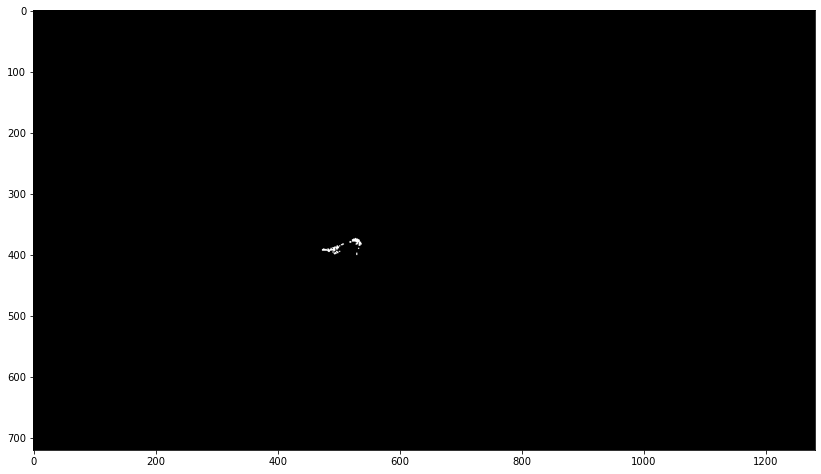

In [9]:
imshow_frame(frame)

let's look at the original frame

In [10]:
%time frame = vf.get_frame(130)

Wall time: 280 ms


(<Figure size 1008x1792 with 1 Axes>, <AxesSubplot:>)

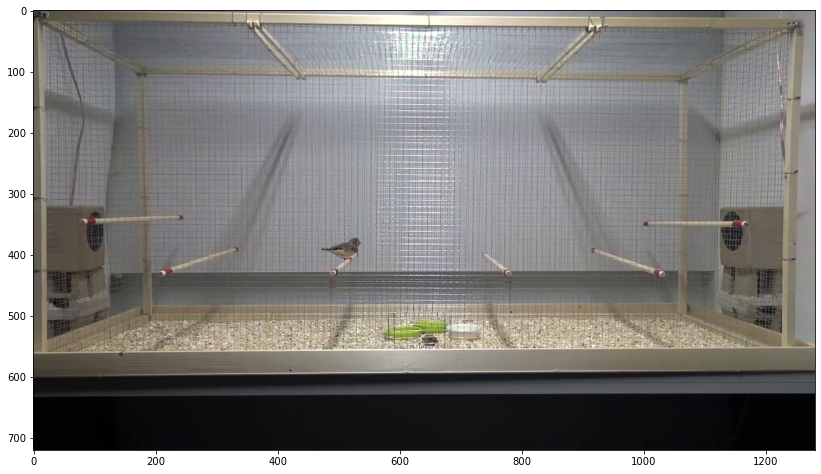

In [11]:
imshow_frame(frame)